# Part 1: Convolutional Neural Network

###  Importing packages

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.utils import to_categorical

### Preparing Dataset

In [ ]:
batch_size = 100
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
y_train = to_categorical(y_train, num_classes)
y_test =to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Building a Model

In [ ]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 5, 5, 16)          0         
                                                                 
 flatten_12 (Flatten)        (None, 400)             

### Model Training

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

600/600 [==============================] - 19s 30ms/step - loss: 0.5821 - accuracy: 0.8122 - val_loss: 0.1232 - val_accuracy: 0.9633


### Testing

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12317407131195068
Test accuracy: 0.9632999897003174


### Prediction

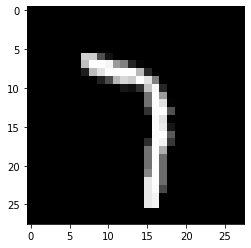

In [ ]:
import pylab as plt

plt.imshow(x_test[122].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
import numpy as np
li=[0.5, 0,0.4, 0,0,0]
li=np.array(li)
thresholded = (li>=0.5)*1
thresholded 

array([1, 0, 0, 0, 0, 0])

In [ ]:
import numpy as np
prediction = model.predict(x_test[122:123])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1])

Prediction Score:
 [6.93159654e-06 2.29419402e-05 1.45782379e-03 3.76535696e-03
 9.71567351e-06 1.35782684e-05 1.11820626e-07 9.92763937e-01
 1.72992368e-04 1.78658636e-03]

Thresholded Score:
 [0 0 0 0 0 0 0 1 0 0]

Predicted Digit:
 [7]
